In [2]:
# ENSF 444 Final Project

#Names: Charbel Maroun, Aly Masani,Ali Hassanein

In [4]:
#Removing Warnings

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [6]:
#Importing the data set

import pandas as pd
import numpy as np

data_set = pd.read_csv('student_depression_dataset.csv')

data_set.head()


,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


# 1. Data Processing

In [9]:
# Checking for missing value and data types

print("Missing values in each column:")
print(data_set.isnull().sum())


# Check data types of each column
print("\nData types of each column:")
print(data_set.dtypes)

Missing values in each column:
id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

Data types of each column:
id                                         int64
Gender                                    object
Age                                      float64
City   

In [11]:

#Dropping the columnms that we thought didn't seem fit
data_set.drop(columns=['Work Pressure'], inplace=True) # Since they are all zeros
data_set.drop(columns=['Job Satisfaction'], inplace=True)
data_set.drop(columns=['Degree'], inplace=True)
data_set.drop(columns=['City'], inplace=True)
data_set.drop(columns=['Profession'], inplace=True)

In [13]:
#Re-naming certian columns for better clarity
data_set.rename(columns={
    'Have you ever had suicidal thoughts ?': 'suicidal_thoughts',
    'Family History of Mental Illness': 'family_history_mental_illness'
}, inplace=True)




#Making sure they are in boolean format
bool_cols = ['suicidal_thoughts', 'family_history_mental_illness']
for col in bool_cols:
    data_set[col] = data_set[col].map({'Yes': 1, 'No': 0})



# Changing the type to category for less memory usage and better data
categorical_cols = ['Gender']
for col in categorical_cols:
    data_set[col] = data_set[col].astype('category')

#Removing other from the sleep duration column
data_set = data_set[data_set['Sleep Duration'] != 'Others']


#Making sure that the sleep column has precise values like a float instead of a string
sleep_map = {
    "'Less than 5 hours'": 4.5,
    "'5-6 hours'": 5.5,
    "'7-8 hours'": 7.5,
    "'More than 8 hours'": 8.5,
    "More than 8": 8.5
}

data_set['Sleep Duration'] = data_set['Sleep Duration'].replace(sleep_map)
data_set['Sleep Duration'] = data_set['Sleep Duration'].astype(float)


#Same for deitary habit as sleep duration
dietary_mapping = {"Healthy": 1, "Moderate": 2, "Others": 3, "Unhealthy": 4}
data_set["Dietary Habits"] = data_set["Dietary Habits"].map(dietary_mapping)

# Replacing '?' with NaN
data_set['Financial Stress'] = data_set['Financial Stress'].replace('?', np.nan)

# Converting the column to numeric, forcing errors to NaN
data_set['Financial Stress'] = pd.to_numeric(data_set['Financial Stress'], errors='coerce')

# Computing the mean, ignoring NaN values
mean_value = data_set['Financial Stress'].mean()

# Replacing NaN values with the mean
data_set['Financial Stress'].fillna(mean_value, inplace=True)

#Converting the Type of Age to Integer
data_set['Age'] = data_set['Age'].astype('int64')

print(data_set.dtypes)

print(data_set.head())


id                                  int64
Gender                           category
Age                                 int64
Academic Pressure                 float64
CGPA                              float64
Study Satisfaction                float64
Sleep Duration                    float64
Dietary Habits                      int64
suicidal_thoughts                   int64
Work/Study Hours                  float64
Financial Stress                  float64
family_history_mental_illness       int64
Depression                          int64
dtype: object
   id  Gender  Age  Academic Pressure  CGPA  Study Satisfaction  \
0   2    Male   33                5.0  8.97                 2.0   
1   8  Female   24                2.0  5.90                 5.0   
2  26    Male   31                3.0  7.03                 5.0   
3  30  Female   28                3.0  5.59                 2.0   
4  32  Female   25                4.0  8.13                 3.0   

   Sleep Duration  Dietary Habits  su

In [15]:
print("\nSummary Statistics:")
print(data_set.describe())


 
# Checking For missing values
print("\nMissing Values:")
print(data_set.isnull().sum())


Summary Statistics:
                  id           Age  Academic Pressure          CGPA  \
count   27883.000000  27883.000000       27883.000000  27883.000000   
mean    70450.005667     25.821325           3.141197      7.656143   
std     40643.309337      4.905775           1.381722      1.470657   
min         2.000000     18.000000           0.000000      0.000000   
25%     35057.000000     21.000000           2.000000      6.290000   
50%     70694.000000     25.000000           3.000000      7.770000   
75%    105829.000000     30.000000           4.000000      8.920000   
max    140699.000000     59.000000           5.000000     10.000000   

       Study Satisfaction  Sleep Duration  Dietary Habits  suicidal_thoughts  \
count        27883.000000    27883.000000    27883.000000       27883.000000   
mean             2.943729        6.379174        2.465588           0.632823   
std              1.361083        1.590558        1.239716           0.482044   
min              0.

# 2. Data Visualization

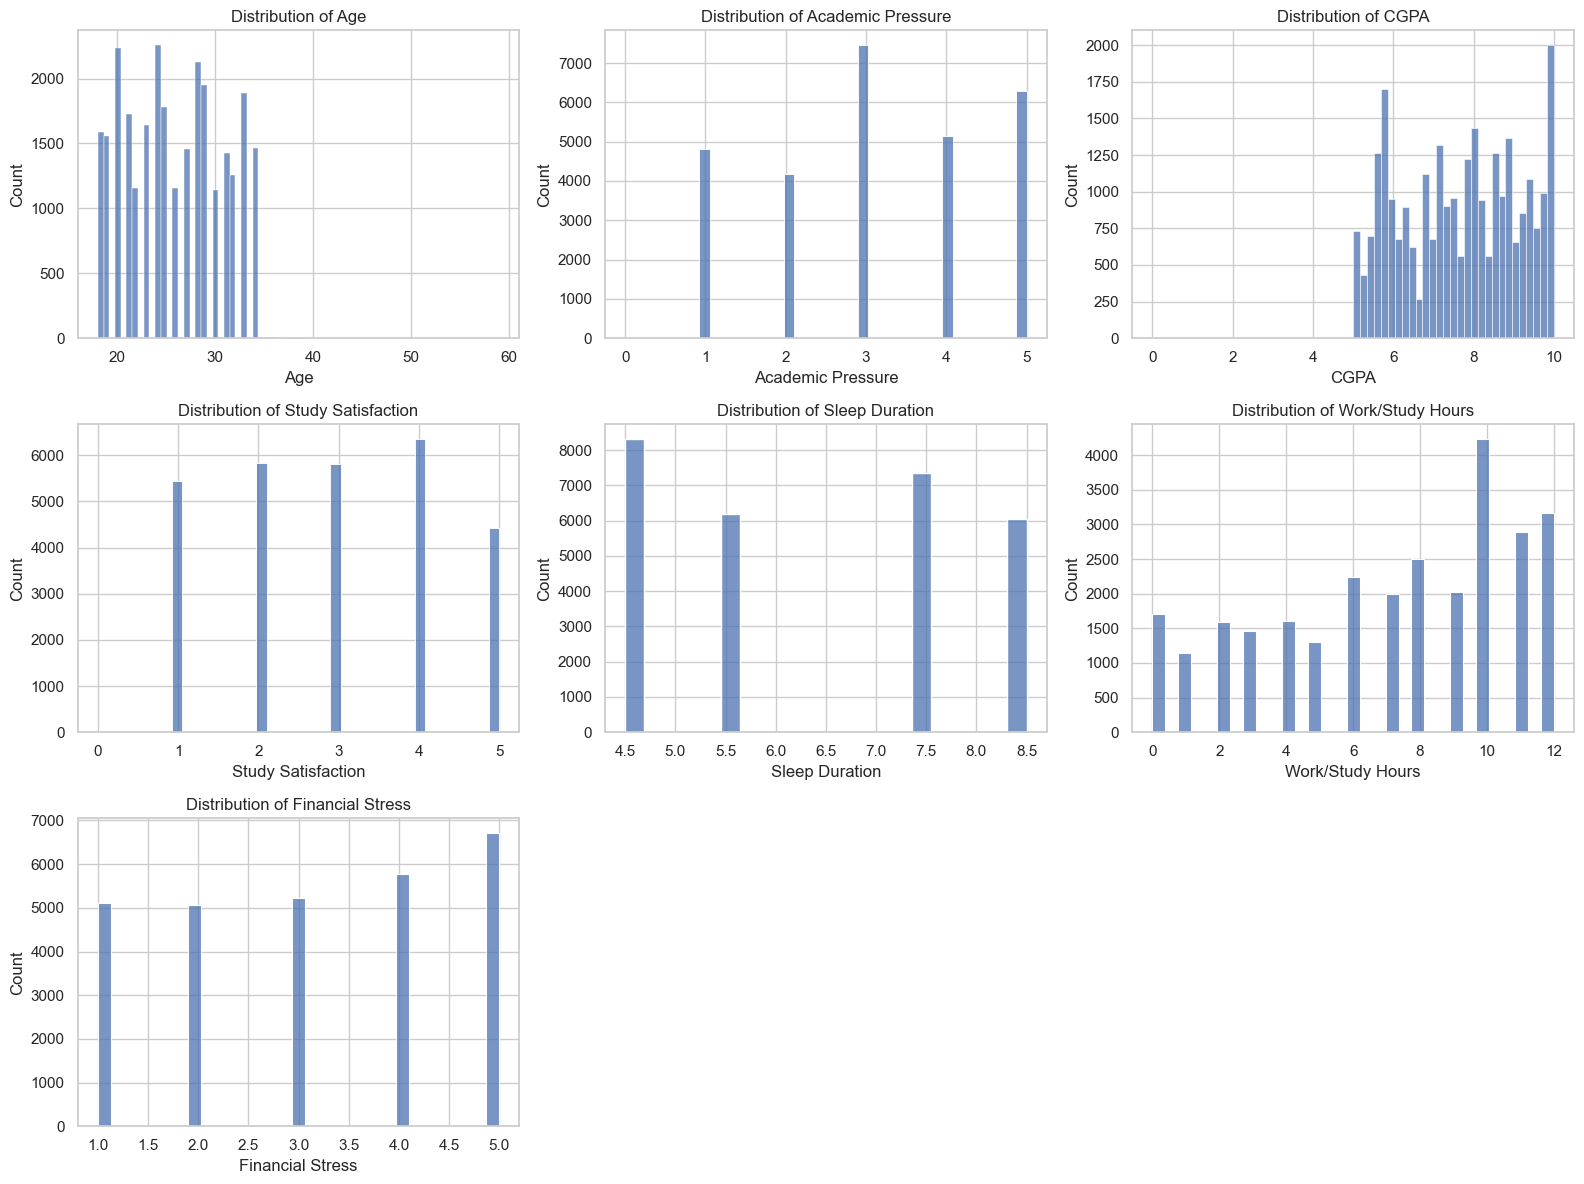

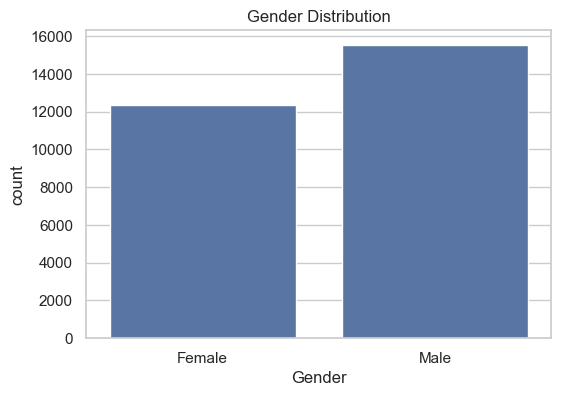

In [18]:

import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid", context="notebook")

# Listing of all features we want to analyze
continuous_vars = ['Age', 'Academic Pressure', 'CGPA', 'Study Satisfaction', 'Sleep Duration', 'Work/Study Hours', 'Financial Stress']

# Plotting histograms
plt.figure(figsize=(16, 12))
for i, col in enumerate(continuous_vars, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data_set[col], kde=False)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

# Bar plot for categorical variable, e.g., Gender distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=data_set)
plt.title("Gender Distribution")
plt.show()

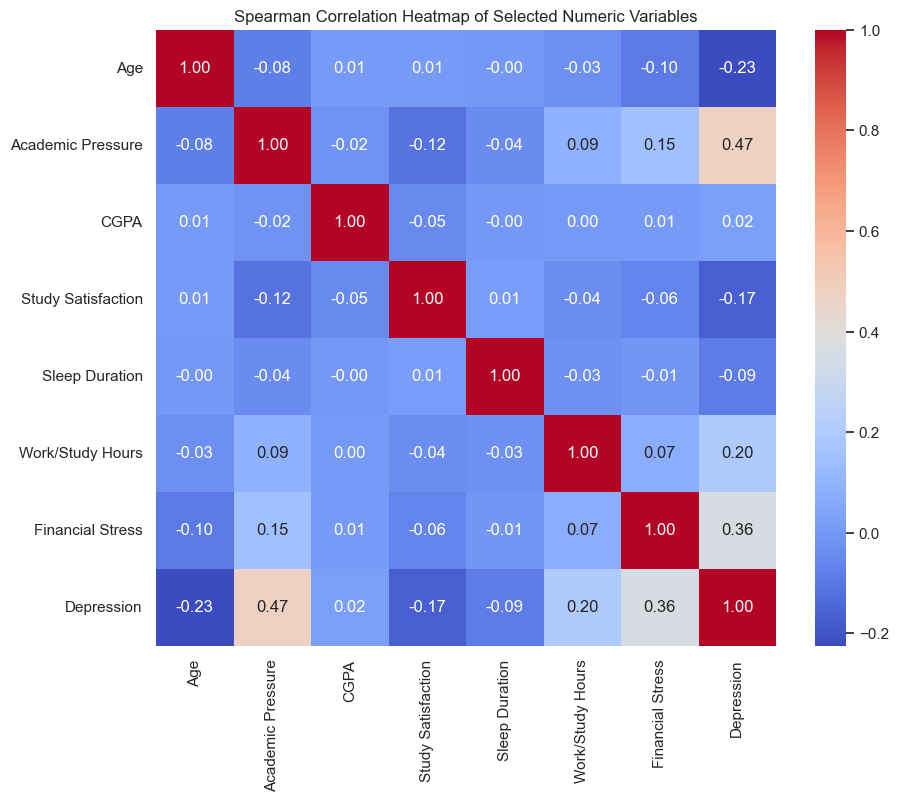

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# defining all columns that are numeric
numeric_cols = [
    'Age', 'Academic Pressure', 'CGPA', 'Study Satisfaction', 
     'Sleep Duration', 'Work/Study Hours', 
    'Financial Stress', 'Depression'
]

# Computing the Spearman correlation matrix
corr_matrix = data_set[numeric_cols].corr(method='spearman')

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Spearman Correlation Heatmap of Selected Numeric Variables")
plt.show()

<Figure size 800x600 with 0 Axes>

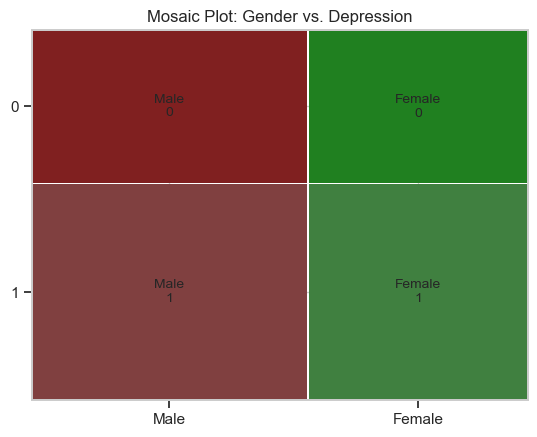

<Figure size 800x600 with 0 Axes>

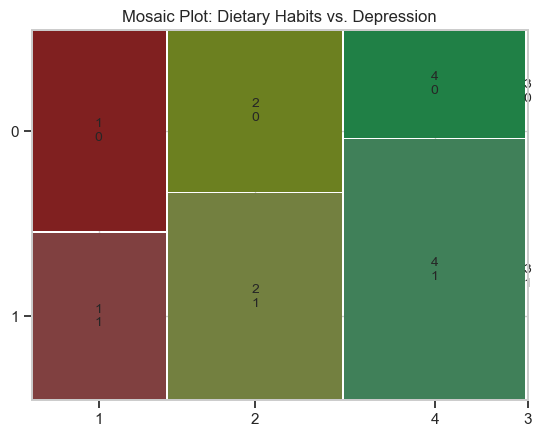

<Figure size 800x600 with 0 Axes>

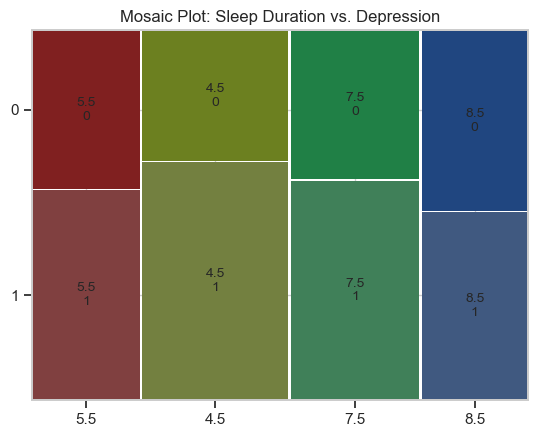

<Figure size 800x600 with 0 Axes>

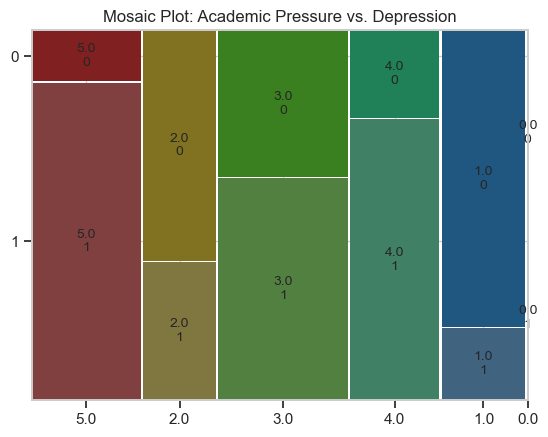

<Figure size 800x600 with 0 Axes>

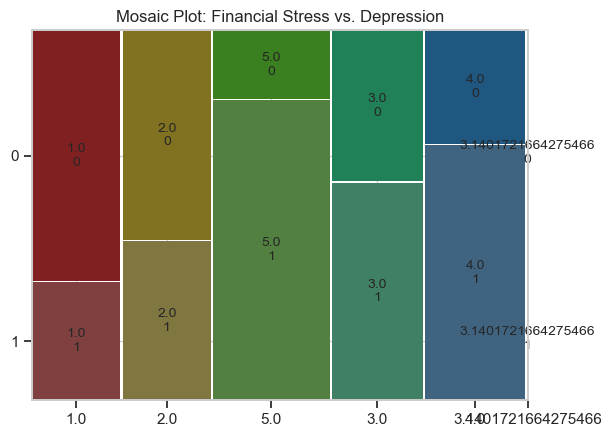

In [20]:
#Using mosaic plots to show the correlation between depresion and the feature. Its a good way of showing it to you without beign overwhelmed by writing.

from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt

# List of categorical variables to analyze
categorical_vars = [
    'Gender','Dietary Habits',  
    'Sleep Duration', 'Academic Pressure','Financial Stress',
]

for var in categorical_vars:
    plt.figure(figsize=(8, 6))
    mosaic(data_set, [var, 'Depression'])
    plt.title(f'Mosaic Plot: {var} vs. Depression')
    plt.show()

In [21]:
# Looking at the Mosaic plots the Dietary Habit number 3 has too little samples so im going to merge them with the dietary habit 4. Also, Financial stress has a qierd value with a 5 count compared to thousands so im merging those

print(data_set['Dietary Habits'].value_counts())

# Merge category 3 into category 4
data_set['Dietary Habits'] = data_set['Dietary Habits'].replace({3: 4})

print("After merging, Dietary Habits categories:", data_set['Dietary Habits'].unique())

print(data_set['Dietary Habits'].value_counts())




data_set.info()


Dietary Habits
4    10309
2     9914
1     7648
3       12
Name: count, dtype: int64
After merging, Dietary Habits categories: [1 2 4]
Dietary Habits
4    10321
2     9914
1     7648
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 27883 entries, 0 to 27900
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   id                             27883 non-null  int64   
 1   Gender                         27883 non-null  category
 2   Age                            27883 non-null  int64   
 3   Academic Pressure              27883 non-null  float64 
 4   CGPA                           27883 non-null  float64 
 5   Study Satisfaction             27883 non-null  float64 
 6   Sleep Duration                 27883 non-null  float64 
 7   Dietary Habits                 27883 non-null  int64   
 8   suicidal_thoughts              27883 non-null  int64   
 9   Work/Study 

In [22]:
#Chi Square Test 

import scipy.stats as stats


categorical_vars = [
    'Gender', 'Dietary Habits', 
    'suicidal_thoughts', 'family_history_mental_illness','Sleep Duration'
]


for var in categorical_vars:
    print(f"Chi-square test for {var} vs. Depression:")
    contingency_table = pd.crosstab(data_set[var], data_set['Depression'])
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    print(f"Chi2 Statistic: {chi2:.4f}")
    print(f"P-value: {p:.4e}")
    print(f"Degrees of Freedom: {dof}")
    print("Contingency Table:")
    print(contingency_table)
    print("\n")

Chi-square test for Gender vs. Depression:
Chi2 Statistic: 0.0886
P-value: 7.6594e-01
Degrees of Freedom: 1
Contingency Table:
Depression     0     1
Gender                
Female      5129  7216
Male        6427  9111


Chi-square test for Dietary Habits vs. Depression:
Chi2 Statistic: 1204.0472
P-value: 3.5033e-262
Degrees of Freedom: 2
Contingency Table:
Depression         0     1
Dietary Habits            
1               4177  3471
2               4359  5555
4               3020  7301


Chi-square test for suicidal_thoughts vs. Depression:
Chi2 Statistic: 8318.0391
P-value: 0.0000e+00
Degrees of Freedom: 1
Contingency Table:
Depression            0      1
suicidal_thoughts             
0                  7860   2378
1                  3696  13949


Chi-square test for family_history_mental_illness vs. Depression:
Chi2 Statistic: 78.5971
P-value: 7.6160e-19
Degrees of Freedom: 1
Contingency Table:
Depression                        0     1
family_history_mental_illness            
0

In [23]:
# The Chi Square results show a good indepent relationship between depression and categorical variables however it's quite wierd that Dietary Habit is e^-262 however we can assume its P< 0.001 since our data set is so large thats this number is not rare.

#Also Gender has a very weak correlation with depression 
data_set.drop(columns=['Gender'], inplace=True)


# 3. Machine Learning Model and Training

In [27]:
#Splitting into target matrix and feature vector

target = 'Depression'
features = ['Age', 'Academic Pressure', 'CGPA', 'Study Satisfaction', 
            'Dietary Habits', 'suicidal_thoughts', 'Work/Study Hours', 
            'Financial Stress', 'family_history_mental_illness', 'Sleep Duration']

X = data_set[features]
y = data_set[target]

In [30]:
# Importing all libraries and models needed

import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

In [33]:
# Creating column Tranformers and Pipelines for each model including param_grid for hypertuning parameters


# Defining the  columns for the preprocessor
numeric_cols = ['Age', 'Academic Pressure', 'CGPA', 'Study Satisfaction', 'Work/Study Hours', 'Financial Stress']
categorical_cols = ['Dietary Habits', 'suicidal_thoughts', 'family_history_mental_illness', 'Sleep Duration']

# Preprocessor for scaling-sensitive models (LR and KNN)
preprocessor_scaled = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

# Preprocessor for Random Forest (scaling not needed)
preprocessor_no_scaling = ColumnTransformer(transformers=[
    ('num', 'passthrough', numeric_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

# Defining the  pipelines for each model
pipeline_lr = Pipeline(steps=[
    ('preprocessor', preprocessor_scaled),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

pipeline_knn = Pipeline(steps=[
    ('preprocessor', preprocessor_scaled),
    ('classifier', KNeighborsClassifier())
])

pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor_no_scaling),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Defining parameter grids for each model
param_grid_lr = {
    'classifier__C': [0.1, 1, 10],
    'classifier__penalty': ['l2'] 
}

param_grid_knn = {
    'classifier__n_neighbors': [3, 5, 7,9],
    'classifier__weights': ['uniform', 'distance']
}

param_grid_rf = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 5, 10],
    'classifier__min_samples_split': [2, 5]
}




In [35]:
#Splitting data into testing and training using 10% test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)





In [39]:
# Setting up GridSearchCV for each pipeline and fitting them
grid_lr = GridSearchCV(pipeline_lr, param_grid=param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1)
grid_knn = GridSearchCV(pipeline_knn, param_grid=param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf = GridSearchCV(pipeline_rf, param_grid=param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)


# Fit grid search for each model on the training data
grid_lr.fit(X_train, y_train)
grid_knn.fit(X_train, y_train)
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         'passthrough',
                                                                         ['Age',
                                                                          'Academic '
                                                                          'Pressure',
                                                                          'CGPA',
                                                                          'Study '
                                                                          'Satisfaction',
                                                                          'Work/Study '
                                                                          'Hours',
                                                                          'Financial '
                                                                          'Stress']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Dietary '
                                                                          'Habits',
                                                                          'suicidal_thoughts',
                                                                          'family_history_mental_illness',
                                                                          'Sleep '
                                                                          'Duration'])])),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [None, 5, 10],
                         'classifier__min_samples_split': [2, 5],
                         'classifier__n_estimators': [100, 200]},
             scoring='accuracy')

In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, r2_score


models = {
    "Logistic Regression": grid_lr,
    "KNN": grid_knn,
    "Random Forest": grid_rf
}

# Loop through each model
for model_name, gs_obj in models.items():
    # Best estimator from the GridSearchCV
    best_model = gs_obj.best_estimator_
    
    # Predictions on training and test data
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)
    
    # Training metrics
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred)
    train_recall = recall_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred)

    # Test metrics
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)
   

    print(f"\n=== {model_name} ===")
    print("Best Params:", gs_obj.best_params_)
    print("CV Accuracy:", gs_obj.best_score_)
    print(f"Train Accuracy:  {train_accuracy:.3f}")
    print(f"Test Accuracy:   {test_accuracy:.3f}")
    print(f"Train Precision: {train_precision:.3f}")
    print(f"Test Precision:  {test_precision:.3f}")
    print(f"Train Recall:    {train_recall:.3f}")
    print(f"Test Recall:     {test_recall:.3f}")
    print(f"Train F1:        {train_f1:.3f}")
    print(f"Test F1:         {test_f1:.3f}")



=== Logistic Regression ===
Best Params: {'classifier__C': 1, 'classifier__penalty': 'l2'}
CV Accuracy: 0.8474939113393815
Train Accuracy:  0.848
Test Accuracy:   0.845
Train Precision: 0.859
Test Precision:  0.852
Train Recall:    0.886
Test Recall:     0.886
Train F1:        0.872
Test F1:         0.869

=== KNN ===
Best Params: {'classifier__n_neighbors': 9, 'classifier__weights': 'uniform'}
CV Accuracy: 0.8317132004798664
Train Accuracy:  0.857
Test Accuracy:   0.830
Train Precision: 0.859
Test Precision:  0.830
Train Recall:    0.904
Test Recall:     0.888
Train F1:        0.881
Test F1:         0.858

=== Random Forest ===
Best Params: {'classifier__max_depth': 10, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 100}
CV Accuracy: 0.843190249312477
Train Accuracy:  0.878
Test Accuracy:   0.843
Train Precision: 0.880
Test Precision:  0.847
Train Recall:    0.917
Test Recall:     0.891
Train F1:        0.898
Test F1:         0.868


In [41]:
# Looking at these Results Logistic Regression is our best model and all accuracies look similar so the models are generalizing the data quite well
# Ou rbest model is Logistic Regression 

# 4. Result Visualization

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'Academic Pressure',
                                                   'CGPA', 'Study Satisfaction',
                                                   'Work/Study Hours',
                                                   'Financial Stress']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Dietary Habits',
                                                   'suicidal_thoughts',
                                                   'family_history_mental_illness',
                                                   'Sleep Duration'])])),
                ('classifier',
                 LogisticRegression(C=1, max_iter=1000, random_state=42))])
Confusion Matrix:
[[ 924  248]
 [ 1

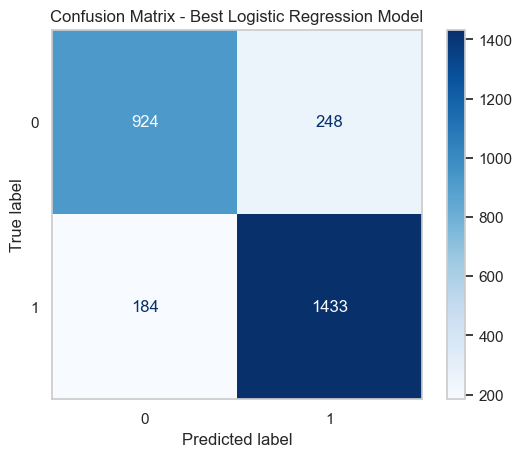

In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Selecting the best model from grid search, for example Logistic Regression
best_model = grid_lr.best_estimator_
print(best_model)
# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.named_steps['classifier'].classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Best Logistic Regression Model")
plt.grid(False)
plt.show()


In [44]:
# There is more false positive than false negative which is better in our case since classifying someone as not depressed eventhough they are depressed can lead to worse outcomes.
# Looking at the table below this is our best threshold since the rest of them have  a huge difference in false postives so the default 0.5 threshold is the best.
import numpy as np
from sklearn.metrics import confusion_matrix, recall_score, precision_score

# 1. Get the best logistic regression model from your grid search
best_lr_model = grid_lr.best_estimator_

# 2. Predict probabilities on the test set
y_probs = best_lr_model.predict_proba(X_test)[:, 1]

threshold_values = np.arange(0.1, 1.0, 0.1)  # thresholds from 0.1 to 0.9

results = []
for thresh in threshold_values:
    y_pred_thresh = (y_probs >= thresh).astype(int)
    
    # 3. Confusion matrix and metrics
    cm = confusion_matrix(y_test, y_pred_thresh)
    tn, fp, fn, tp = cm.ravel()
    recall = recall_score(y_test, y_pred_thresh)
    precision = precision_score(y_test, y_pred_thresh)
    
    results.append({
        'Threshold': thresh,
        'TN': tn,
        'FP': fp,
        'FN': fn,
        'TP': tp,
        'Recall': recall,
        'Precision': precision
    })

# Convert results to a DataFrame for an easy look
import pandas as pd
results_df = pd.DataFrame(results)
print(results_df)


   Threshold    TN   FP   FN    TP    Recall  Precision
0        0.1   498  674   23  1594  0.985776   0.702822
1        0.2   688  484   58  1559  0.964131   0.763093
2        0.3   793  379   91  1526  0.943723   0.801050
3        0.4   852  320  121  1496  0.925170   0.823789
4        0.5   924  248  184  1433  0.886209   0.852469
5        0.6   973  199  250  1367  0.845393   0.872925
6        0.7  1031  141  352  1265  0.782313   0.899716
7        0.8  1082   90  479  1138  0.703772   0.926710
8        0.9  1140   32  774   843  0.521336   0.963429


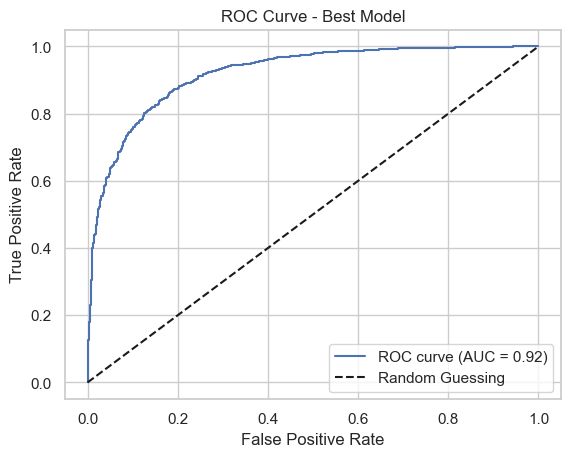

In [45]:
# ROC curve 

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

best_model = grid_lr.best_estimator_


y_probs = best_model.predict_proba(X_test)[:, 1]


fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# 4. Calculating the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, y_probs)

# 5. Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Best Model")
plt.legend(loc="lower right")
plt.show()


In [46]:
from sklearn.metrics import classification_report

#using the best Logistic Regression from GridSearchCV
best_lr_model = grid_lr.best_estimator_

# Getting predictions for the test set
y_pred_lr = best_lr_model.predict(X_test)

# Printing classification report
print("=== Classification Report: Logistic Regression ===")
print(classification_report(y_test, y_pred_lr))


=== Classification Report: Logistic Regression ===
              precision    recall  f1-score   support

           0       0.83      0.79      0.81      1172
           1       0.85      0.89      0.87      1617

    accuracy                           0.85      2789
   macro avg       0.84      0.84      0.84      2789
weighted avg       0.84      0.85      0.84      2789



In [47]:
#Logistic Regression model is delivering strong, balanced classification results with an 84.5% accuracy, high recall (89%) for the positive (depressed) class, and a solid F1-score (0.87) for that class—indicating it’s doing a robust job of identifying individuals likely to be depressed.
# Also, since false negatives are higher consequences, 0.89 recall is perfect eventhough there is more false positives its better than false negatives